In [11]:
import numpy as np
import pandas as pd

# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker as lm #downloaded from http://github.com/jbkinney/logomaker

#add the package search path for MAGGIE
import sys
sys.path.append('..')

# import MAGGIE
from maggie import score, utils

# Load data

In [13]:
# file paths that store positive and negative sequences
path = '../data/PU1/'
pos_seq_files = [path+'BALB_PU1_SpecificBinding_BALB_seqs.fa', path+'C57_PU1_SpecificBinding_C57_seqs.fa']
neg_seq_files = [path+'BALB_PU1_SpecificBinding_C57_seqs.fa', path+'C57_PU1_SpecificBinding_BALB_seqs.fa']

# read sequences as Biopython "Seq" into a dictionary
pos_seq_dict, neg_seq_dict = utils.cat_fasta_files(pos_seq_files, neg_seq_files)

# read motif files and store in a dictionary
motif_dict = score.load_motifs('../data/JASPAR2020_CORE_vertebrates_motifs/')
print('Loaded %d motifs' % (len(motif_dict)))

Loaded 1011 motifs


# Compute and test for a specific motif
Go to JASPAR database to look for the name and ID of your motif: http://jaspar.genereg.net/

Motif with the same name can have multiple versions, distinguished by their motif IDs

In [14]:
# search for the key of some motif in the loaded motifs
motif_name = 'SPI1'
[k for k in motif_dict if motif_name in k]

['SPI1$MA0080.5', 'SPI1$MA0080.1', 'SPI1$MA0080.4', 'SPI1$MA0080.2']

/gpfs/data01/glasslab/home/zes017/.conda/envs/maggie/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


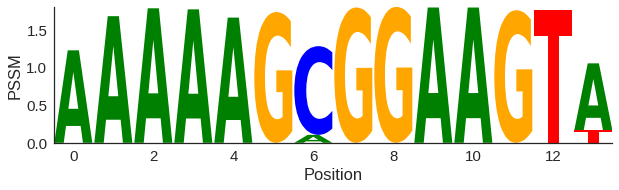

In [15]:
# visualize the PWM logo of a motif using "logomaker" package (Tareen and Kinney, Bioinformatics, 2019)
display_motif = 'SPI1$MA0080.4'
display_df = pd.DataFrame(motif_dict[display_motif].pssm)
display_df = display_df[['A', 'C', 'G', 'T']]
display_df.index.name = 'pos'
display_df = display_df*(display_df>0)

sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(12,8)})
logo = lm.Logo(df=display_df,
               font_name='Arial Rounded MT Bold',
               fade_below=0.8,
               shade_below=0.1)
sns.despine(top=True)
logo.ax.set_xlabel('Position')
logo.ax.set_ylabel('PSSM');

In [16]:
# compute motif score differences for one motif
motif_key = 'SPI1$MA0080.4'
name, ID, statistics, pvals, score_diffs = score.test_one_motif(motif_dict[motif_key], pos_seq_dict, neg_seq_dict)
print('Signed -log10(p-value) for %s-%s is: %.2f' % (name, ID, pvals[0]))

Signed -log10(p-value) for SPI1-MA0080.4 is: 110.09


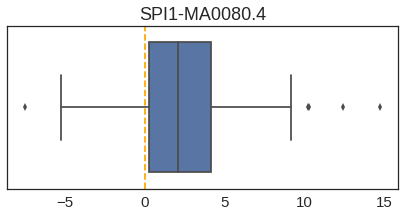

In [17]:
# plot distribution for non-zero differences
score_diffs = np.array(score_diffs)
sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(7,3)})
sns.boxplot(score_diffs[score_diffs!=0])
plt.axvline(0, linestyle='--', c='orange')
plt.title(name+'-'+ID);

It is also possible to extract motif scores for input sequences:

In [18]:
# compute motif scores for positive and negative sequences
pos_scores = score.compute_scores(motif_dict[motif_key], pos_seq_dict)
neg_scores = score.compute_scores(motif_dict[motif_key], neg_seq_dict)
# convert to numpy arrays
pos_scores = np.array(pos_scores)
neg_scores = np.array(neg_scores)

/gpfs/data01/glasslab/home/zes017/.conda/envs/maggie/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


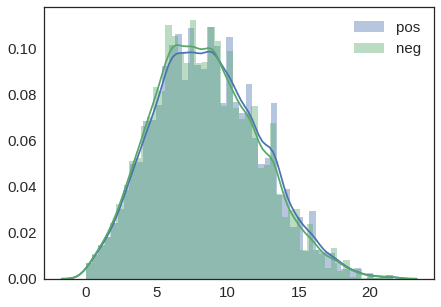

In [19]:
sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(7,5)})
sns.distplot(pos_scores[pos_scores!=0], label='pos')
sns.distplot(neg_scores[neg_scores!=0], label='neg')
plt.legend();

Distribution of motif scores may not show as obvious difference between positive and negative sequences as score differences.